In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [8]:
df

,Дата,Склад,Контрагент,Номенклатура,Количество
0,2018-01-04,1,address_0,product_0,4
1,2018-01-04,1,address_0,product_1,4
2,2018-01-04,1,address_0,product_2,5
3,2018-01-04,1,address_0,product_3,10
4,2018-01-04,1,address_0,product_4,2
...,...,...,...,...,...
301350,2018-08-31,5,address_173,product_15,0
301351,2018-08-31,5,address_173,product_17,1
301352,2018-08-31,5,address_173,product_18,1
301353,2018-08-31,5,address_173,product_19,0


Проверяем формат столбцов

In [9]:
df.dtypes

,0
Дата,object
Склад,int64
Контрагент,object
Номенклатура,object
Количество,int64


Сразу переведем столбец "Дата" в правильный формат

In [10]:
df['Дата'] = pd.to_datetime(df['Дата'])

In [11]:
df.dtypes

,0
Дата,datetime64[ns]
Склад,int64
Контрагент,object
Номенклатура,object
Количество,int64


Сгруппируйте данные по дате, посчитайте количество продаж

In [12]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()

Вывести несколько первых строк сгруппированных данных

In [13]:
grouped_df.head(7)

,Дата,Количество
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055
5,2018-01-10,3653
6,2018-01-11,3176


Нарисуйте график продаж у `grouped_df`

Text(0, 0.5, 'Количество продаж')

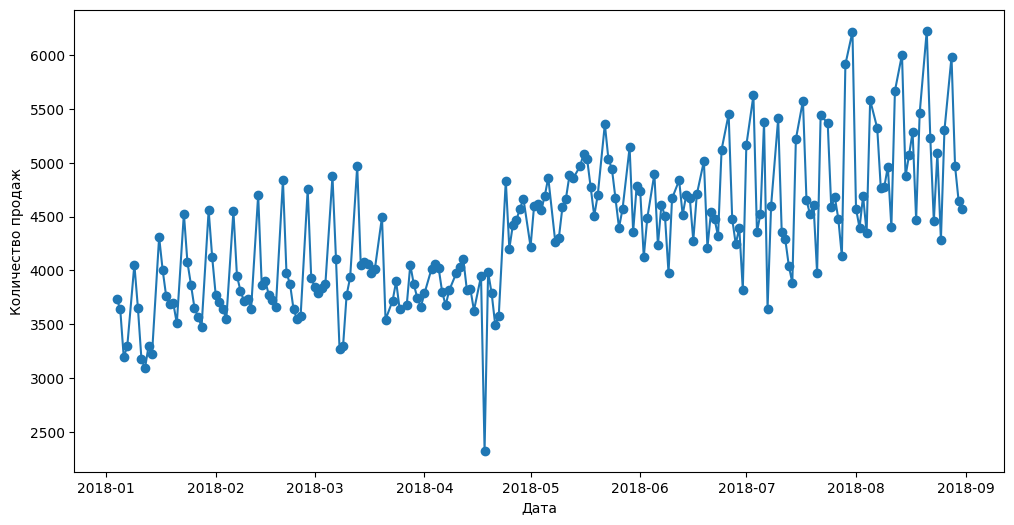

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o', linestyle='-')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')

Опишите что вы видите на графике. Ваша задача - максимально описать график

График демонстрирует изменения объёма продаж по дням с начала года до августа 2018 года. На оси X указаны даты, а на оси Y — суммарное количество продаж за каждый день. Основные выводы:

**Общая тенденция:** В целом наблюдается рост продаж с течением времени.

**Колебания:** На графике заметны регулярные колебания, что может свидетельствовать о периодичности спроса. Например, высокие продажи наблюдаются через определённые интервалы, возможно, из-за особенностей дней недели или маркетинговых мероприятий.

**Аномалии:** В середине графика виден резкий спад продаж, который может быть связан с сезонным снижением спроса, техническими сбоями или временным отсутствием товара. В конце графика можно увидеть пики, когда продажи значительно превышают средний уровень, что может указывать на влияние специальных событий или акций.

**Сезонные изменения:** В определённые моменты график демонстрирует стабильные продажи, а в другие — значительные колебания, что может свидетельствовать о сезонных колебаниях спроса.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [15]:
max_sales_row = df[df['Количество'] == df['Количество'].max()]
max_sales_row

,Дата,Склад,Контрагент,Номенклатура,Количество
218822,2018-06-28,1,address_208,product_0,200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [16]:
three_month_and_third_warehouse = df[(df['Дата'].dt.month.isin([6, 7, 8])) & (df['Склад'] == 3)]
top_product = three_month_and_third_warehouse.groupby('Номенклатура')['Количество'].sum().idxmax()

print(top_product)
print(df[df['Номенклатура'] == top_product]['Количество'].sum())

product_1
180771


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

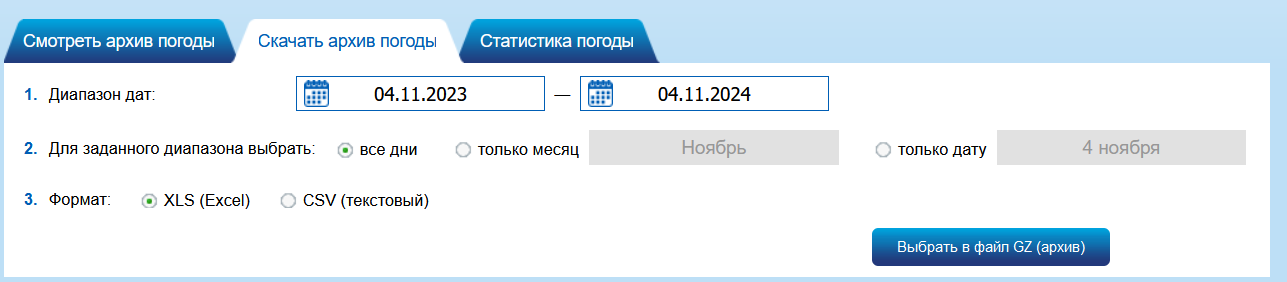


In [18]:
weather_df = pd.read_excel('weather.xls', skiprows=6)
weather_df.head()

,Местное время в Астане,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,01.09.2018 23:00,5.5,737.1,769.1,0.1,84.0,"Ветер, дующий с северо-северо-востока",2,NaN,NaN,...,NaN,NaN,NaN,2.9,Следы осадков,12.0,NaN,NaN,NaN,NaN
1,01.09.2018 20:00,6.1,737.0,769.0,1.0,78.0,"Ветер, дующий с севера",2,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,2.5,Следы осадков,12.0,NaN,NaN,NaN,NaN
2,01.09.2018 17:00,7.5,736.0,767.7,0.2,78.0,"Ветер, дующий с северо-востока",1,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,3.8,NaN,NaN,NaN,NaN,NaN,NaN
3,01.09.2018 14:00,9.1,735.8,767.4,-0.5,55.0,"Ветер, дующий с северо-северо-востока",3,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN
4,01.09.2018 11:00,7.7,736.3,768.1,-0.2,61.0,"Ветер, дующий с северо-северо-востока",3,NaN,NaN,...,NaN,NaN,10.0,0.5,Следы осадков,12.0,NaN,NaN,NaN,NaN


In [19]:
# Оставить только первые две колонны (дата и температура)
weather_df = weather_df.iloc[:, :2]
weather_df

,Местное время в Астане,T
0,01.09.2018 23:00,5.5
1,01.09.2018 20:00,6.1
2,01.09.2018 17:00,7.5
3,01.09.2018 14:00,9.1
4,01.09.2018 11:00,7.7
...,...,...
1945,01.01.2018 14:00,-6.7
1946,01.01.2018 11:00,-8.5
1947,01.01.2018 08:00,-11.1
1948,01.01.2018 05:00,-10.8


In [20]:
# Переимновать колонну "Местное время в Астане" в Дата
weather_df = weather_df.rename(columns={'Местное время в Астане': 'Дата'})
weather_df

,Дата,T
0,01.09.2018 23:00,5.5
1,01.09.2018 20:00,6.1
2,01.09.2018 17:00,7.5
3,01.09.2018 14:00,9.1
4,01.09.2018 11:00,7.7
...,...,...
1945,01.01.2018 14:00,-6.7
1946,01.01.2018 11:00,-8.5
1947,01.01.2018 08:00,-11.1
1948,01.01.2018 05:00,-10.8


In [21]:
weather_df['Дата'] = pd.to_datetime(weather_df['Дата'], format='%d.%m.%Y %H:%M')
weather_df.dtypes

,0
Дата,datetime64[ns]
T,float64


In [22]:
# Преобразуем столбец 'Дата' в тип datetime и оставляем только дату (без времени)
weather_df['Дата'] = pd.to_datetime(weather_df['Дата']).dt.date

# Группируем данные по столбцу 'Дата' и вычисляем средние значения для остальных столбцов
weather_df = weather_df.groupby('Дата', as_index=False).mean()

# Просматриваем результат после группировки
print(weather_df)

           Дата        T
0    2018-01-01  -9.4625
1    2018-01-02  -9.5125
2    2018-01-03 -11.4625
3    2018-01-04 -14.0750
4    2018-01-05 -16.8625
..          ...      ...
239  2018-08-28  14.1125
240  2018-08-29  13.8250
241  2018-08-30  14.1750
242  2018-08-31  11.0250
243  2018-09-01   6.8000

[244 rows x 2 columns]


In [23]:
# Переведем столбец "Дата" в правильный формат
weather_df['Дата'] = pd.to_datetime(weather_df['Дата'], format='%d-%m-%Y')
weather_df.dtypes

,0
Дата,datetime64[ns]
T,float64


In [24]:
weather_df = weather_df.merge(grouped_df, on='Дата')
weather_df

,Дата,T,Количество
0,2018-01-04,-14.0750,3734
1,2018-01-05,-16.8625,3643
2,2018-01-06,-13.3000,3193
3,2018-01-07,-12.7500,3298
4,2018-01-09,-6.2500,4055
...,...,...,...
200,2018-08-26,11.9750,5302
201,2018-08-28,14.1125,5983
202,2018-08-29,13.8250,4969
203,2018-08-30,14.1750,4648


<Axes: xlabel='Дата'>

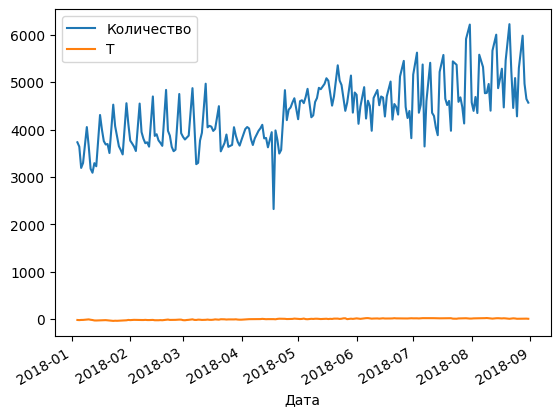

In [25]:
weather_df.plot(x='Дата', y=['Количество', 'T'])

<Axes: xlabel='Дата'>

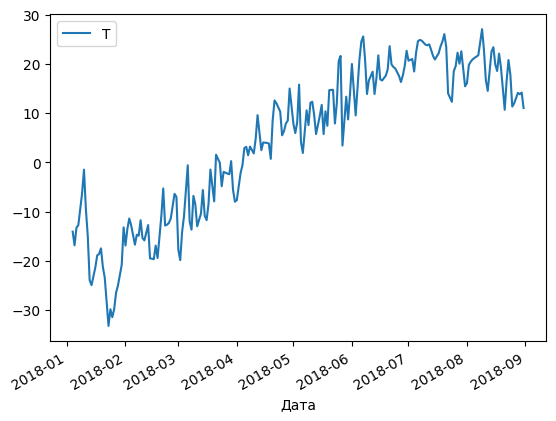

In [26]:
weather_df.plot(x='Дата', y='T')